### Step 1. Open the data file and study the general information. 

In [1]:
%pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
from pylab import *

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

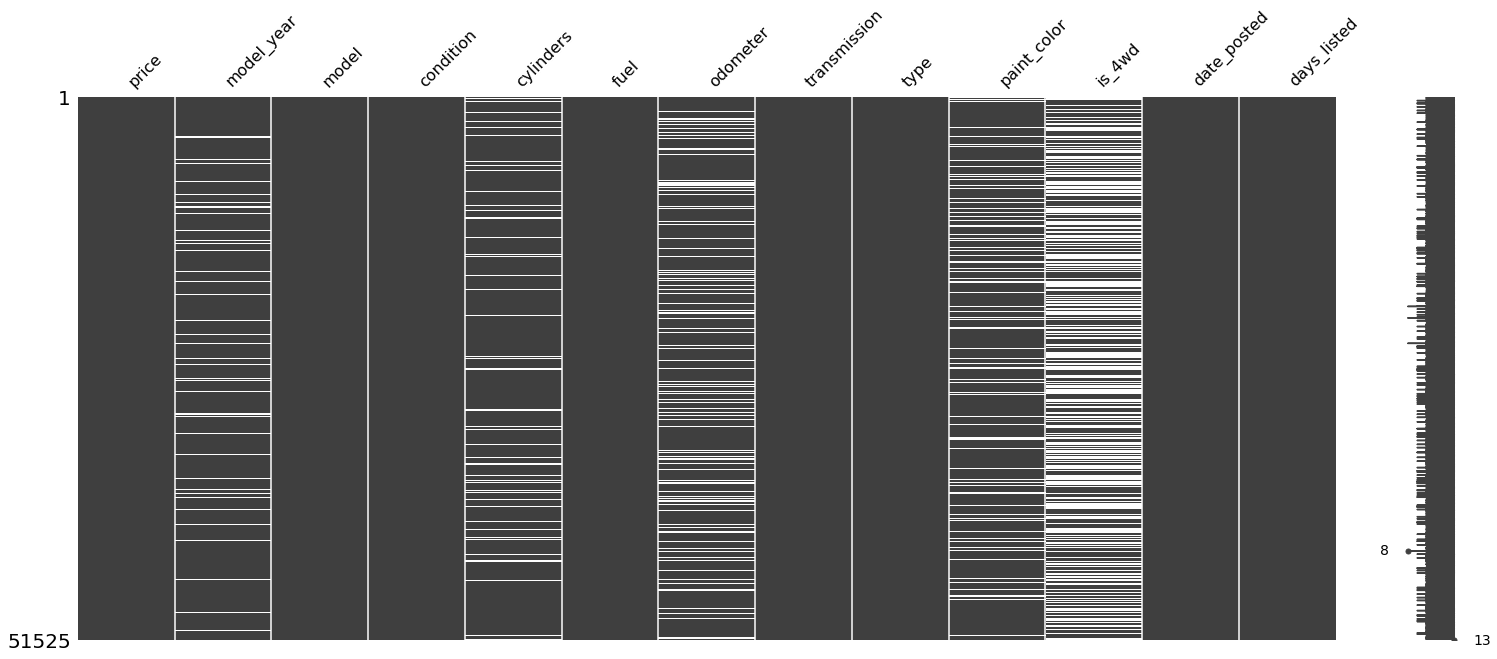

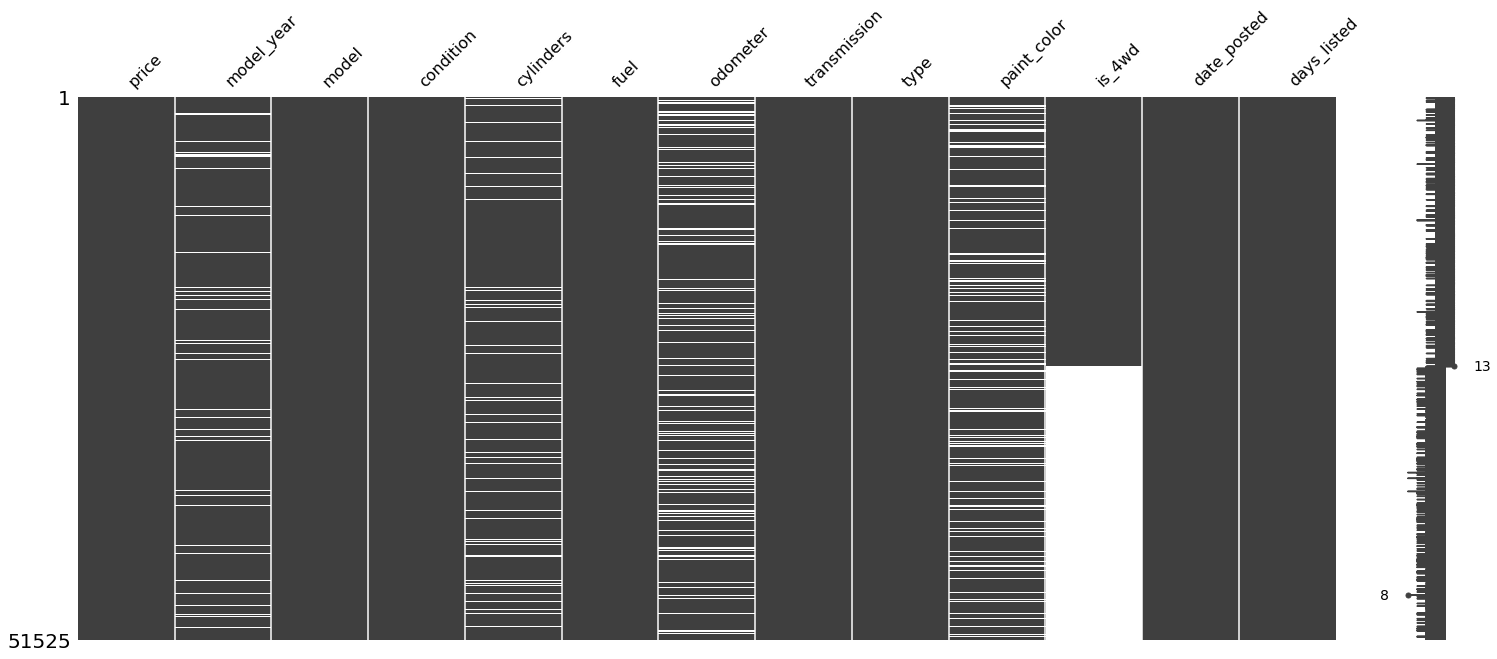

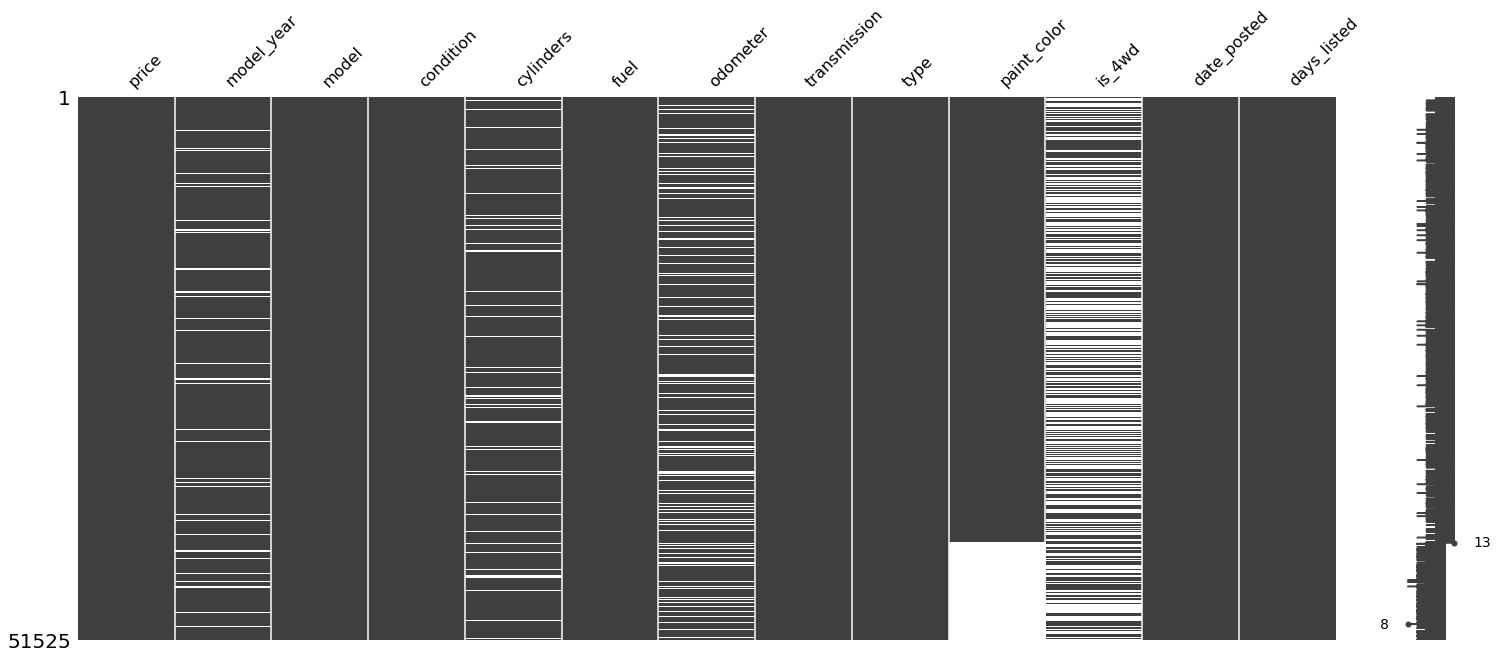

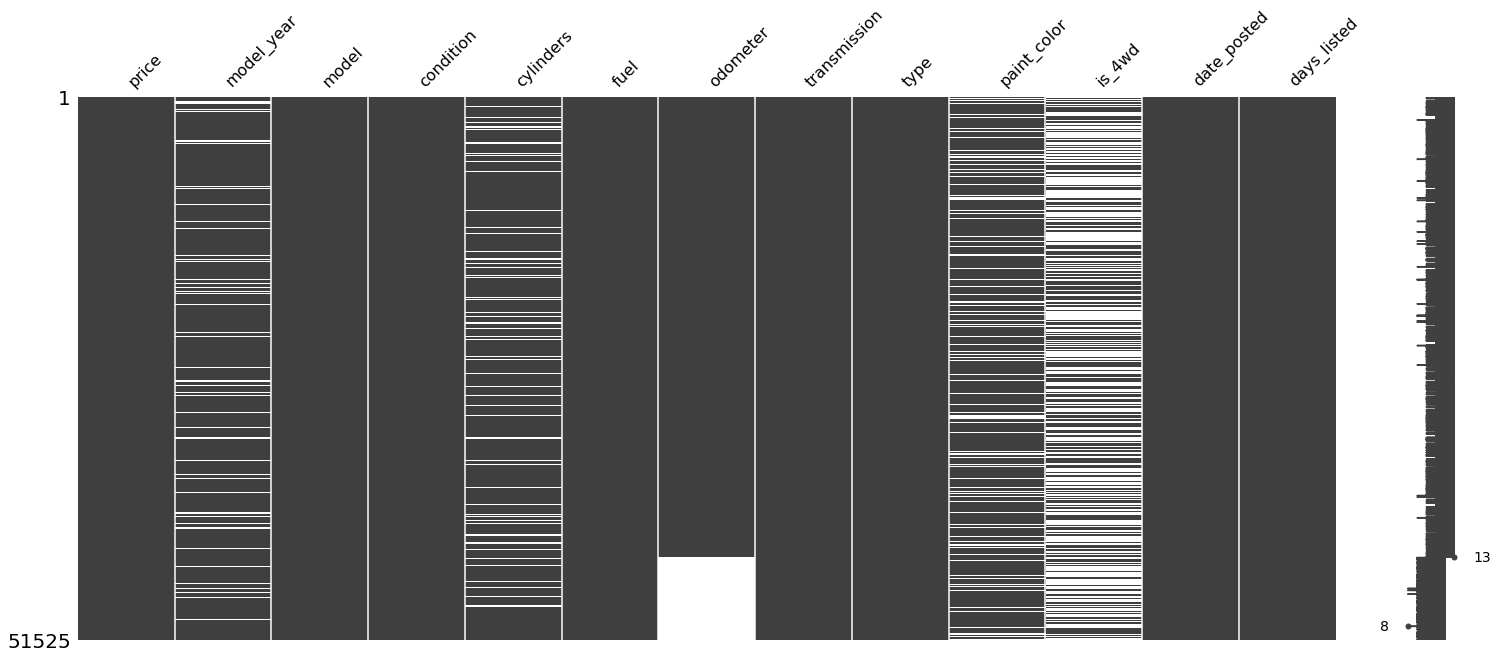

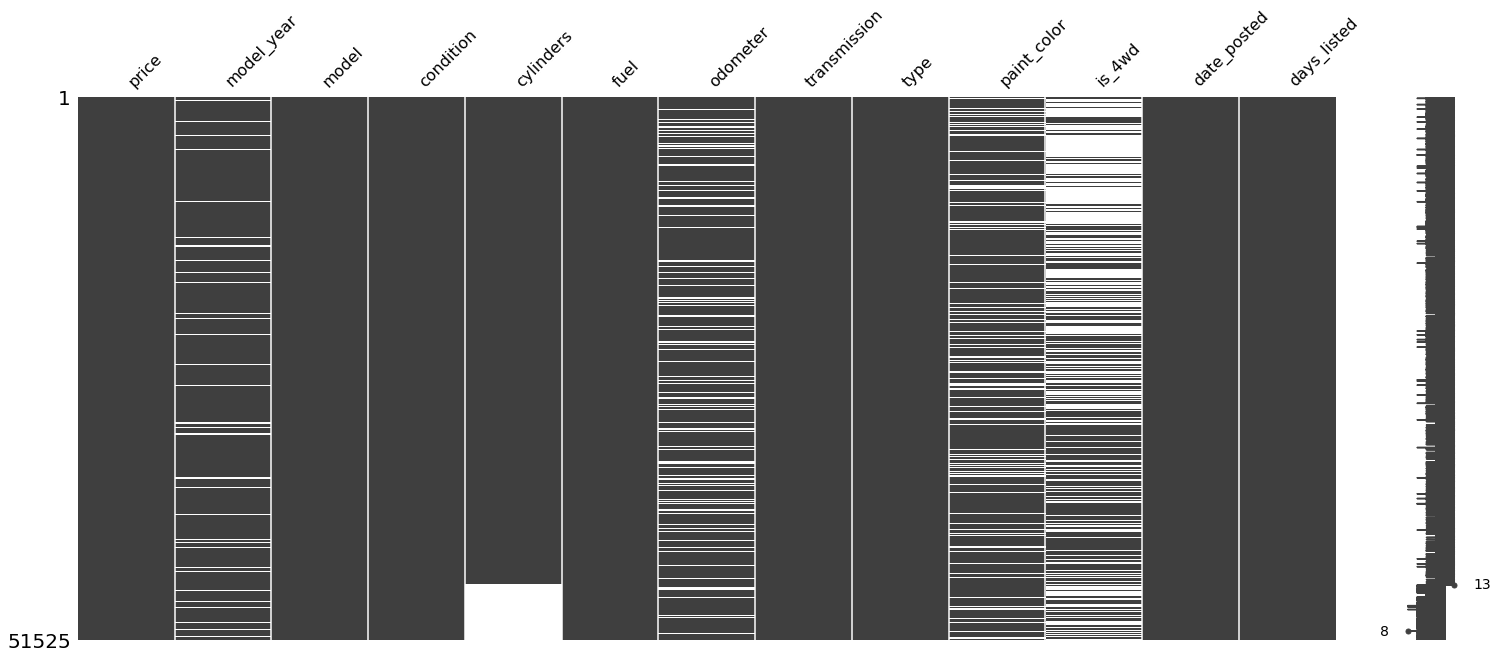

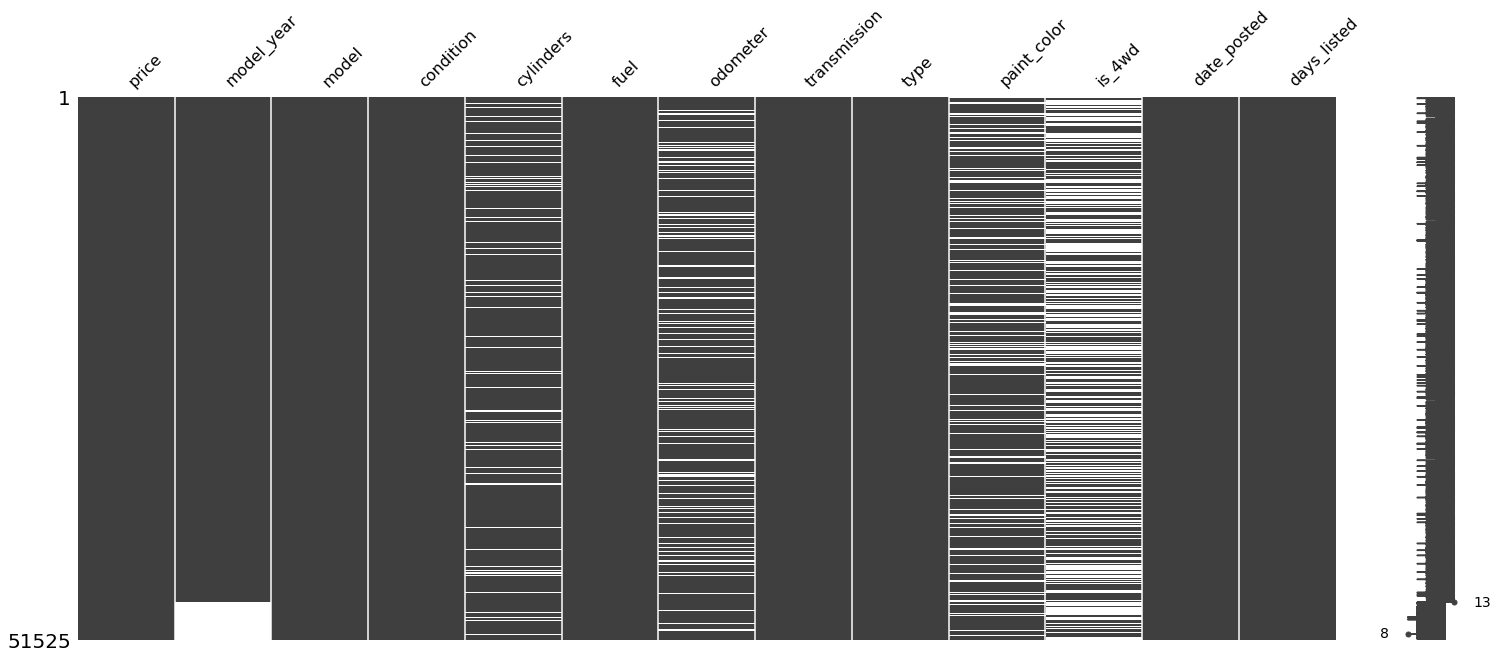

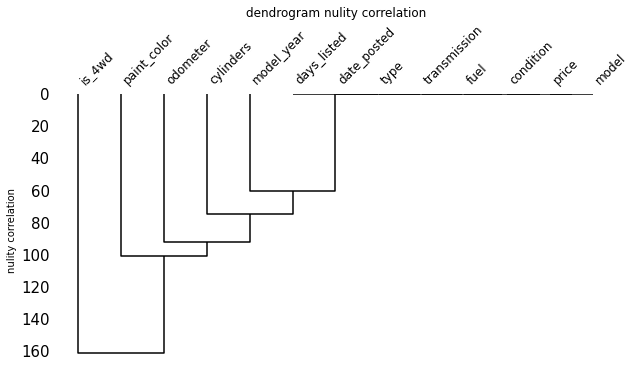

In [3]:
price_factors = pd.read_csv("vehicles_us.csv")
display(price_factors.head())
display(price_factors.info())
display(price_factors.isnull().sum())

#checking duplicates in model column
pd.concat(g for _, g in price_factors.groupby("model") if len(g) > 1)

#checking missing at random
msno.matrix(price_factors)
sorted1=price_factors.sort_values('is_4wd')
sorted2=price_factors.sort_values('paint_color')
sorted3=price_factors.sort_values('odometer')
sorted4=price_factors.sort_values('cylinders')
sorted5=price_factors.sort_values('model_year')
msno.matrix(sorted1)
msno.matrix(sorted2)
msno.matrix(sorted3)
msno.matrix(sorted4)
msno.matrix(sorted5)
msno.dendrogram(price_factors, figsize=(10,5), fontsize=12);
plt.title('dendrogram nulity correlation')
plt.ylabel('nulity correlation')

plt.show()



There is missing values in is_4wd,paint_color,odometer,cylinders and model_year columns.There is no strong co-relation of missingness observed which is checked by msno() sorted method.So, the data missing at random hypothesis is interpreted.There might be a reason for missingness in between is_4wd and paint_color columns that cannot be directly observed which is also shown in dendogram tree plot.is_4wd is a boolean column only having two possible value'1' or 'NaN'.So, there is a systematic relationshio between missingness and obserbed data, but not the missing data.

### Step 2. Data preprocessing

True

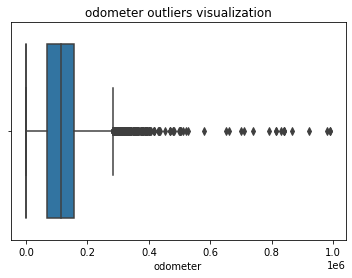

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  object        
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 5.5+ MB


None

no     25953
yes    25572
Name: is_4wd, dtype: int64

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,yes,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,white,no,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28


In [4]:
display(price_factors.isna().any().any())

# converting date_posted column from object type to datatime 
price_factors['date_posted'] = pd.to_datetime(price_factors['date_posted'], format='%Y-%m-%d') 

#null value of column model_year is filled with the mode value for each model
price_factors['model_year'] = price_factors.groupby('model')['model_year'].transform(lambda grp:grp.fillna(grp.mode()[0]))

# The rows are deleted which have values with 'nan' in model_year column
price_factors = price_factors[price_factors.model_year != 'nan']

#cylinders column null values filled up with mean values because there is no outliers
sns.boxplot(x=price_factors['cylinders'])
mean_cylinders=price_factors['cylinders'].mean()
price_factors['cylinders'].fillna(mean_cylinders, inplace=True)

#null value of column odometer is filled with the median value using trasnform method of model column as it has outliers
sns.boxplot(x=price_factors['odometer'])
plt.title('odometer outliers visualization')
plt.show()
price_factors['odometer'] = price_factors.groupby('model')['odometer'].transform(lambda x: x.fillna(x.median()))

#rest null values is filled with median 
median_odometer=price_factors['odometer'].median()
price_factors['odometer'].fillna(median_odometer, inplace=True)

##null value of column paint_colour is filled with the mode value for each model
price_factors['paint_color'] = price_factors.groupby('model')['paint_color'].transform(lambda grp:grp.fillna(grp.mode()[0]))

# converting is_4wd column from float type to string 
price_factors['is_4wd'] = price_factors['is_4wd'].astype(str)

# converting is_4wd column value 1.0 to 'yes' and NaN value to 'no' 
price_factors['is_4wd'] = price_factors['is_4wd'].map({'1.0': 'yes'})
price_factors['is_4wd'] = price_factors['is_4wd'].fillna('no')


display(price_factors.info())
display(price_factors['is_4wd'].value_counts())
display(price_factors.isnull().sum())
display(price_factors.head(5))

date_posted column have been changed from object type to datetime type.Then null value of column model_year is filled with the mode value for each model.Then cylinders column null values filled up with mean values because there is no outliers.After that null value of odometer column is filled with the median value using trasnform method of model column as it has outliers.Then null value of column paint_colour is filled with the mode value for each model.Finally, the logical is_4wd column converted from float type to string and the value of is_4wd column 1.0 to 'yes' and NaN value to 'no' have been considered.

### Step 3. Make calculations and add them to the table

In [5]:
# new table is added for Day of the week, month, and year from the ad was placed
price_factors['Ad_posted_weekday']=price_factors['date_posted'].dt.weekday
price_factors['Ad_posted_month']=price_factors['date_posted'].dt.month
price_factors['Ad_posted_year']=price_factors['date_posted'].dt.year

#Vehicle age calculation
price_factors['vehicle_age']=price_factors['Ad_posted_year']-price_factors['model_year']

# converting vehicle column from float type to integer 
price_factors['vehicle_age'] = price_factors['vehicle_age'].astype(int)

#replace resulting infinite values in vehicle_age column with the corresponding odometer value of the observation

price_factors['vehicle_millege_per_year'] = (price_factors['odometer']) / (price_factors['vehicle_age'])
price_factors['vehicle_millege_per_year'] = price_factors['odometer'].apply(lambda x : price_factors['odometer'] if x == float('inf') else x)    

    
#vehicle_average_mileage_per_year
vehicle_average_mileage_per_year = price_factors.pivot_table(index = 'model',values = 'vehicle_millege_per_year')

#In the condition column, string values is replaced with a numeric scale:
def car_condition(condition):
    
    if condition == 'salvage':
        return 0
    if condition == 'fair':
        return 1
    if condition == 'good':
        return 2
    if condition == 'excellent':
        return 3
    if condition == 'like new':
        return 4
    if condition == 'new':
        return 5
price_factors['condition'] = price_factors['condition'].apply(car_condition)
   
display(vehicle_average_mileage_per_year.sort_values(by='vehicle_millege_per_year', ascending = False))
display(price_factors.head())
display(price_factors.info())
display(price_factors.head())

,vehicle_millege_per_year
model,
ford f350 super duty,165790.292683
ford f-250,160765.620853
chevrolet trailblazer,157413.854902
ford expedition,154388.739247
toyota 4runner,153081.750552
...,...
ford f150 supercrew cab xlt,62174.995413
chevrolet silverado 1500 crew,45563.518152
ford mustang gt coupe 2d,35262.833887


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Ad_posted_weekday,Ad_posted_month,Ad_posted_year,vehicle_age,vehicle_millege_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,yes,2018-06-23,19,5,6,2018,7,145000.0
1,25500,2013.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,10,2018,5,88705.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2,2019,6,110000.0
3,1500,2003.0,ford f-150,1,8.0,gas,121928.0,automatic,pickup,white,no,2019-03-22,9,4,3,2019,16,121928.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,4,2019,2,80903.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  float64       
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  int64         
 4   cylinders                 51525 non-null  float64       
 5   fuel                      51525 non-null  object        
 6   odometer                  51525 non-null  float64       
 7   transmission              51525 non-null  object        
 8   type                      51525 non-null  object        
 9   paint_color               51525 non-null  object        
 10  is_4wd                    51525 non-null  object        
 11  date_posted               51525 non-null  datetime64[ns]
 12  days_listed       

None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Ad_posted_weekday,Ad_posted_month,Ad_posted_year,vehicle_age,vehicle_millege_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,yes,2018-06-23,19,5,6,2018,7,145000.0
1,25500,2013.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,10,2018,5,88705.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2,2019,6,110000.0
3,1500,2003.0,ford f-150,1,8.0,gas,121928.0,automatic,pickup,white,no,2019-03-22,9,4,3,2019,16,121928.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,4,2019,2,80903.0


New column for Day of the week, month, and year from date_posted is added to the dataframe.Then vehicle age is calculated subtracting ad_posted_year and model_year column and vehicle_age column is converted to integer type.After that vehicle_millege_per_year is calculated dividing odometer column to vehicle_age column.There is infinite values present in vehicle_millege_per_year column which have been replaced with correspoding odometer value.Then vehicle_average_mileage_per_year is calculated using pivot_table grouping with car model.In the condition column, string values is replaced with a numeric scale using car condition function.

### Step 4. Carry out exploratory data analysis

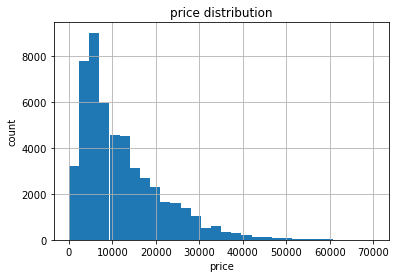

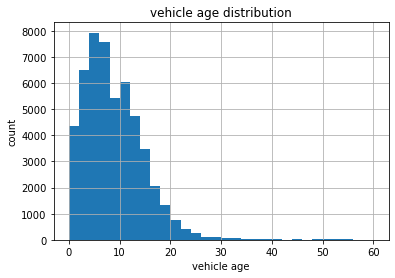

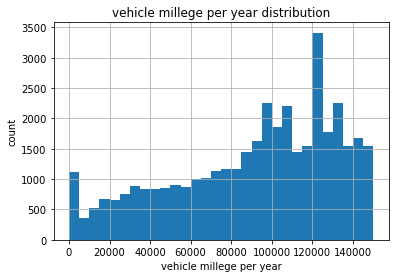

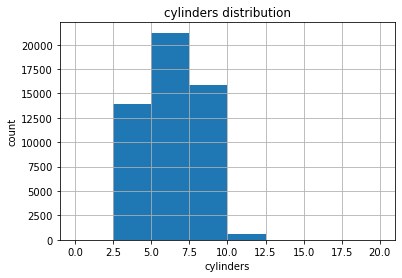

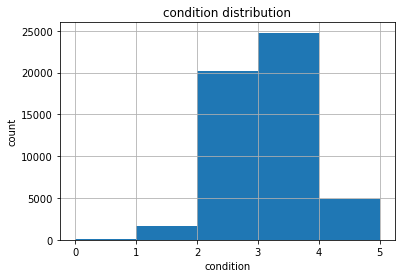

In [6]:
#how outliers affect the form and readability of the histograms
price_factors.hist('price' , bins = 30, range = (0,70000))
plt.title('price distribution')
plt.xlabel("price")
plt.ylabel("count")
price_factors.hist('vehicle_age' , bins = 30, range = (0,60))
plt.title('vehicle age distribution')
plt.xlabel("vehicle age")
plt.ylabel("count")
price_factors.hist('vehicle_millege_per_year' , bins = 30, range = (0,150000))
plt.title('vehicle millege per year distribution')
plt.xlabel("vehicle millege per year")
plt.ylabel("count")
price_factors.hist('cylinders' , bins = 8, range = (0,20))
plt.title('cylinders distribution')
plt.xlabel("cylinders")
plt.ylabel("count")
price_factors.hist('condition' , bins = 5,range= (0,5))
plt.title('condition distribution')
plt.xlabel("condition")
plt.ylabel("count")
plt.show()


The outliers and distributions of price,vehicle_age,vehicle_millege_per_year,cylinders and condition column have been visually determined using histogram plot.

In [7]:
#Determine the upper and lower limits of outliers and remove the outliers(price column)
price_filtered = price_factors
display(price_factors['price'].describe())
uw_4 =(price_factors['price'].quantile(0.75))+(1.5*((price_factors['price'].quantile(0.75))-(price_factors['price'].quantile(0.25))))
lw_4=(price_factors['price'].quantile(0.25))-(1.5*((price_factors['price'].quantile(0.75))-(price_factors['price'].quantile(0.25))))
print(uw_4)
print(lw_4)
price_filtered = price_factors.query(' @lw_4 <= price <= @uw_4 ')
display(price_filtered.head())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

34597.5
-12758.5


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Ad_posted_weekday,Ad_posted_month,Ad_posted_year,vehicle_age,vehicle_millege_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,yes,2018-06-23,19,5,6,2018,7,145000.0
1,25500,2013.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,10,2018,5,88705.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2,2019,6,110000.0
3,1500,2003.0,ford f-150,1,8.0,gas,121928.0,automatic,pickup,white,no,2019-03-22,9,4,3,2019,16,121928.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,4,2019,2,80903.0


price_filtered is our new filtered dataframe.To remove outliers from price column,only -12758.5 <= price <= 34597.5 is considered using query method.

In [8]:
#Determine the upper limits of outliers and remove the outliers(vehicle age column)

display(price_factors['vehicle_age'].describe())
uw_1 = (price_factors['vehicle_age'].quantile(0.75))+(1.5*((price_factors['vehicle_age'].quantile(0.75))-(price_factors['vehicle_age'].quantile(0.25))))
lw_1 = (price_factors['vehicle_age'].quantile(0.25))-(1.5*((price_factors['vehicle_age'].quantile(0.75))-(price_factors['vehicle_age'].quantile(0.25))))
print(uw_1)
print(lw_1)
vehicle_age_filtered = price_factors.query('@lw_1 <= vehicle_age <= @uw_1 ')
display(vehicle_age_filtered.head())

count    51525.000000
mean         8.436429
std          6.158509
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

24.0
-8.0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Ad_posted_weekday,Ad_posted_month,Ad_posted_year,vehicle_age,vehicle_millege_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,yes,2018-06-23,19,5,6,2018,7,145000.0
1,25500,2013.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,10,2018,5,88705.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2,2019,6,110000.0
3,1500,2003.0,ford f-150,1,8.0,gas,121928.0,automatic,pickup,white,no,2019-03-22,9,4,3,2019,16,121928.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,4,2019,2,80903.0


To remove outliers from vehicle age column, only -8 <= age <= 24 is considered.

In [9]:
#Determine the upper limits of outliers and remove the outliers(vehicle millege per year column)

display(price_factors['vehicle_millege_per_year'].describe())
uw_2 =(price_factors['vehicle_millege_per_year'].quantile(0.75))+(1.5*((price_factors['vehicle_millege_per_year'].quantile(0.75))-(price_factors['vehicle_millege_per_year'].quantile(0.25))))
lw_2 = (price_factors['vehicle_millege_per_year'].quantile(0.25))-(1.5*((price_factors['vehicle_millege_per_year'].quantile(0.75))-(price_factors['vehicle_millege_per_year'].quantile(0.25))))
print(uw_2)
print(lw_2)
vehicle_millege_per_year_filtered = price_factors.query(' @lw_2 <= vehicle_millege_per_year <= @uw_2 ')

count     51525.000000
mean     115338.092159
std       60614.500425
min           0.000000
25%       77100.000000
50%      115376.000000
75%      148177.000000
max      990000.000000
Name: vehicle_millege_per_year, dtype: float64

254792.5
-29515.5


To remove outliers from vehicle millege per year column, only -29515.5 <= millege <= 254792.5 is considered.

In [10]:
#Determine the upper limits of outliers and remove the outliers(cylinders column)

display(price_factors['cylinders'].describe())
uw_3 =(price_factors['cylinders'].quantile(0.75))+(1.5*((price_factors['cylinders'].quantile(0.75))-(price_factors['cylinders'].quantile(0.25))))
lw_3= (price_factors['cylinders'].quantile(0.25))-(1.5*((price_factors['cylinders'].quantile(0.75))-(price_factors['cylinders'].quantile(0.25))))
print(uw_3)
print(lw_3)
cylinders_filtered = price_factors.query(' @lw_3 <= cylinders <= @uw_3')

count    51525.000000
mean         6.125235
std          1.573327
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

14.0
-2.0


To remove outliers from cylinders column, only -2 <= cylinders <= 14 is considered.

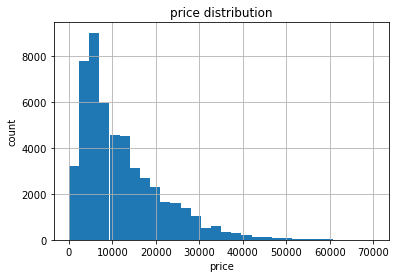

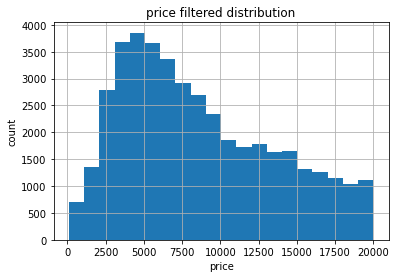

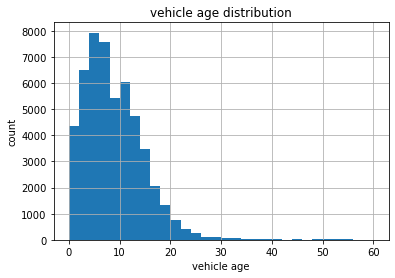

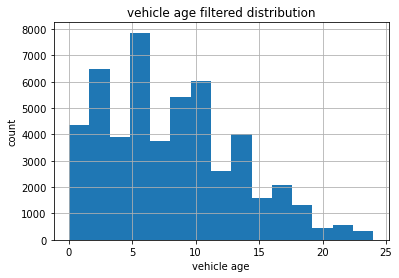

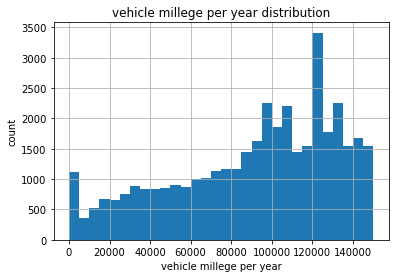

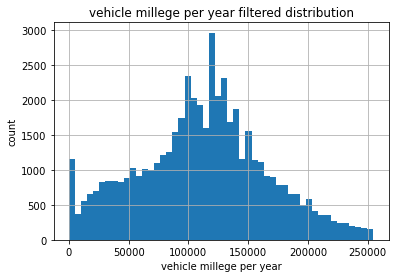

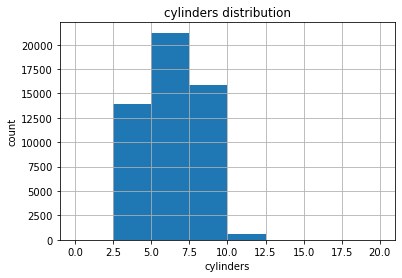

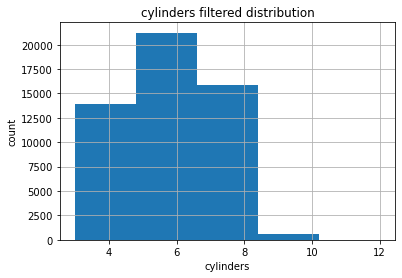

In [11]:
#compare unfiltered and filtered data
#price column
price_factors.hist('price' , bins = 30, range = (0,70000))
plt.title('price distribution')
plt.xlabel("price")
plt.ylabel("count")
price_filtered.hist('price' , bins = 20,range=(100,20000))
plt.title('price filtered distribution')
plt.xlabel("price")
plt.ylabel("count")

# vehicle age column
price_factors.hist('vehicle_age' ,bins = 30, range = (0,60))
plt.title('vehicle age distribution')
plt.xlabel("vehicle age")
plt.ylabel("count")
vehicle_age_filtered.hist('vehicle_age', bins = 15)
plt.title('vehicle age filtered distribution')
plt.xlabel("vehicle age")
plt.ylabel("count")

#vehicle_millege_per_year
price_factors.hist('vehicle_millege_per_year', bins = 30, range = (0,150000))
plt.title('vehicle millege per year distribution')
plt.xlabel("vehicle millege per year")
plt.ylabel("count")
vehicle_millege_per_year_filtered.hist('vehicle_millege_per_year', bins = 50)
plt.title('vehicle millege per year filtered distribution')
plt.xlabel("vehicle millege per year")
plt.ylabel("count")

#cylinders column
price_factors.hist('cylinders' , bins = 8, range = (0,20))
plt.title('cylinders distribution')
plt.xlabel("cylinders")
plt.ylabel("count")
cylinders_filtered.hist('cylinders', bins = 5)
plt.title('cylinders filtered distribution')
plt.xlabel("cylinders")
plt.ylabel("count")
plt.show()


All the ouliers are remove using 1.5*IQR rule.

1.To remove outliers from price column,only -12758.5 <= price <= 34597.5 is considered using query method.Car price less than 5000 is most popular.

2.To remove outliers from vehicle age column, only -8 <= age <= 24 is considered.Most of the car in between 5-6 years old.

3.To remove outliers from vehicle millege per year column, only -29515.5 <= millege <= 254792.5 is considered.Most of the ads placed about the car whose run atleast 100000 millege per year.

4.To remove outliers from cylinders column, only -2 <= cylinders <= 14 is considered.Car having 5-6 cylinders are most popular.

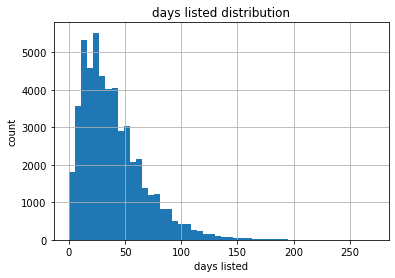

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

days_listed_median: 33.0
days_listed_column_length: 51525
short_days_listed_column_length: 54
long_days_listed_column_length: 1946


In [12]:
#Study how many days advertisement were displayed

price_factors.hist('days_listed', bins = 50)
plt.title('days listed distribution')
plt.xlabel("days listed")
plt.ylabel("count")
plt.show()

display(price_factors['days_listed'].describe())
print('days_listed_median:' ,price_factors['days_listed'].median())
print('days_listed_column_length:',len(price_factors['days_listed']))
print('short_days_listed_column_length:',len(price_factors.query(' days_listed == 0 ')))
print('long_days_listed_column_length:',len(price_factors.query(' days_listed > 100 and days_listed < 300 ')))

The mean and median of the day_listed column are 39.5 and 33 days respectively.The mean and median have deviation because some ads really statyed longtime which behaves like outliers.The typical lifetime of an ad is about 40 days.Some ads are removed very quickly less than 24 hours,either they sold out or advertiser change their mind not to sell.On the other hand, some ads lasted longer than 3 months which is abnormal behavior.In the next analysis, we can find out which type are more demandable or which are not.

,type,Average price
1,bus,17135.666667
10,truck,14820.840606
8,pickup,14609.742072
3,coupe,13269.010782
6,offroad,13177.674757
2,convertible,12511.617021
7,other,10507.194444
0,SUV,10359.897968
12,wagon,8880.496408
11,van,8743.340102


,type,Number of ads
9,sedan,12147
0,SUV,12104
10,truck,11550
8,pickup,6622
3,coupe,2226
12,wagon,1531
5,mini-van,1157
4,hatchback,1046
11,van,591
2,convertible,423


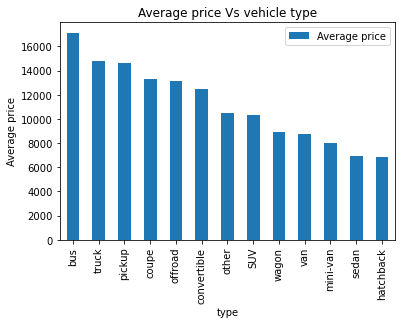

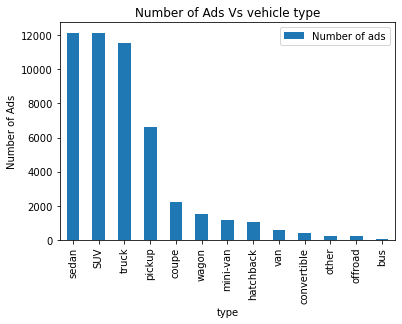

In [13]:
#Analyze the number of ads and the average price for each type of vehicle

#avg_price by type
avg_price_grouped = price_filtered.pivot_table(index = 'type',values = 'price', aggfunc='mean').reset_index()
avg_price_grouped.columns=['type','Average price']


#avg_ads placed by type

avg_ads_grouped = price_filtered.pivot_table(index = 'type',values = 'days_listed', aggfunc='count').reset_index()
avg_ads_grouped.columns=['type','Number of ads']
display(avg_price_grouped.sort_values(by='Average price',ascending=False))
display(avg_ads_grouped.sort_values(by='Number of ads',ascending=False))



#join_avg_ads_price= (avg_price_grouped.combine_first(avg_ads_grouped)).sort_values(by='days_listed',ascending=False)
#Column name changes to avg_ads and avg_price of join_avg_ads_price pivot table
#join_avg_ads_price.columns=['avg_ads','avg_price']

#display(join_avg_ads_price)
#join_avg_ads_price.plot(kind='bar',x=)


(avg_price_grouped.sort_values(by='Average price',ascending=False)).plot(kind='bar',x='type',y='Average price', xlabel='type',ylabel='Average price',title='Average price Vs vehicle type')

(avg_ads_grouped.sort_values(by='Number of ads',ascending=False)).plot(kind='bar',x='type',y='Number of ads',xlabel='type',ylabel='Number of Ads',title='Number of Ads Vs vehicle type')
plt.show()



#The most ads is placed for sedan and SUV type car which have avg price of approx. 6942 and approx. 10359.Both type of cars have publication to removal time is avg 40 days.

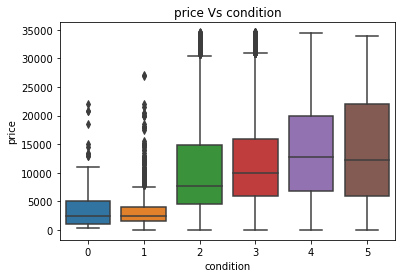

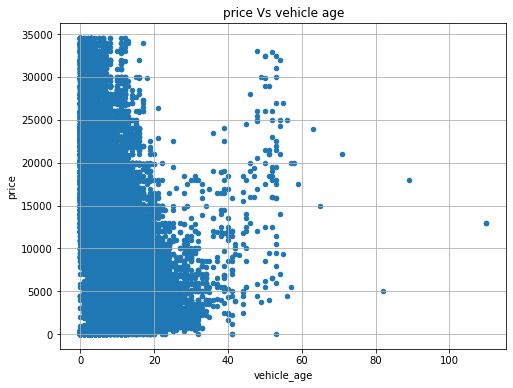

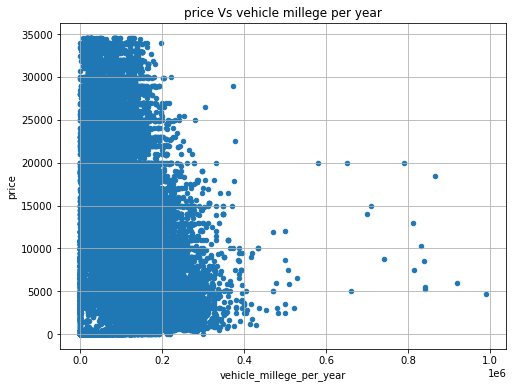

In [14]:
#Factors impact the price most

sns.boxplot(x='condition',y='price',data=price_filtered).set(title='price Vs condition');
price_filtered.plot(x='vehicle_age', y='price', kind='scatter', figsize=(8, 6), sharex=False, grid=True,title='price Vs vehicle age');
price_filtered.plot(x='vehicle_millege_per_year', y='price', kind='scatter', figsize=(8, 6), sharex=False, grid=True,title= 'price Vs vehicle millege per year');

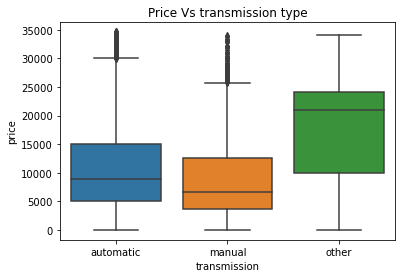

In [15]:
sns.boxplot(x='transmission',y='price',data=price_filtered[price_filtered.type != 'bus']).set(title='Price Vs transmission type');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'white'),
  Text(2, 0, 'red'),
  Text(3, 0, 'silver'),
  Text(4, 0, 'blue'),
  Text(5, 0, 'grey'),
  Text(6, 0, 'custom'),
  Text(7, 0, 'orange'),
  Text(8, 0, 'yellow'),
  Text(9, 0, 'brown'),
  Text(10, 0, 'green'),
  Text(11, 0, 'purple')])

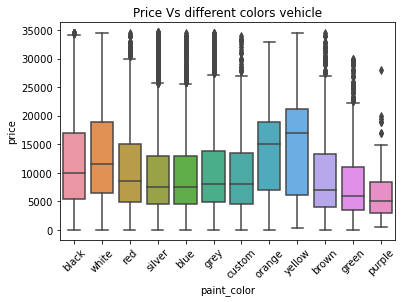

In [16]:
sns.boxplot(x='paint_color',y='price',data=price_filtered[price_filtered.type != 'bus']).set(title= 'Price Vs different colors vehicle')
plt.xticks(rotation=45)

In [17]:
print(price_filtered['price'].corr(price_filtered['vehicle_age']))
print(price_filtered['price'].corr(price_filtered['vehicle_millege_per_year']))
print(price_filtered['price'].corr(price_filtered['condition']))

-0.44303742928607276
-0.39089235836147485
0.1996936381159705


Only the bus category have 24 ads which is less than 50 ads and is not considered for analyzing categorical variables.There is a reverse relationship between vehicle age and price.Higher the age, lower the price and lower the price,higher the age.There is also a reverse relationship between vehicle_millege_per_year and price observed.The car which condition is good,excellent and like new have higher price.Automatic car is higher price than manual car.The others type of transmission for exmaple, semi automatic or dual clutch or continuously variable transmission are higher price than only automatic/manual cars. Yellow color car have higher price and the purple have the lowest price.White color car is more popular than black color car.

### Key factors to increase the vehicle price high:

**1. Vehicle age:**
Price have a reverse relasionship with the vehicle age.Lower the age, higher the price.

**2. Vehicle condition:**
The car which condition is good,excellent and like new have higher price​.

**3. Vehicle millege per year:**
If the used millege per year is low,the price is high.A reverse relasionship have been obseved.

**4. Car transmission:**
Automatic car have higher price than manual car.The others type of transmission for exmaple, semi automatic or dual clutch or continuously variable transmission are higher price than only automatic/manual cars.

**5. Car colors:**
Yellow color car have higher price and the purple have the lowest price.White color car is more popular than black color car.

#### So, if someone have limited budget to buy a car, it is hard to combine all the parameters together.But I strongly recommend to buy a manual transmission purple color higher milleges used  car.